## VISUALIZATIONS

# Mirar Tutoriales
* https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68

* https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd

* https://medium.com/datadriveninvestor/feature-selection-a-b-test-with-tableau-462cb8d949e0

In [1]:
#Before we get to the data, let’s initialize our environment:

import numpy as np
import pandas as pd
#pd.options.display.max_columns = 12
# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')
# We will display plots right inside Jupyter Notebook
#%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
#sns.set()
# Graphics in SVG format are more sharp and legible
#%config InlineBackend.figure_format = 'svg'
# Increase the default plot size
#from pylab import rcParams
#rcParams['figure.figsize'] = 1, 1

In [2]:
col_Names = ['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan',  
         'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
         'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 
         'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'Churn']

df = pd.read_csv('ChurnCaseDataset/churn.all.txt', names=col_Names) #, header = -1, ,  dtype=str
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
international_plan               5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [4]:
df['Churn'] = df['Churn'].map(lambda x: str(x)[:-1])
df.head()
df['Churn'].value_counts()

 False    4293
 True      707
Name: Churn, dtype: int64

In [5]:
#change the type of the variables
df['area_code'] = df['area_code'].astype('str')
df['state'] = df['state'].astype('str')
df['phone_number'] = df['phone_number'].astype('str')
df['Churn'] = df['Churn'].astype('str')
df['international_plan'] = df['international_plan'].astype('str')
df['voice_mail_plan'] = df['voice_mail_plan'].astype('str')

In [6]:
#The map method can be used to replace values in a column by passing a 
#dictionary of the form {old_value: new_value} as its argument:
#d = {'False' : '0', 'True' : '1'} 
#df['Churn'] = df['Churn'].map(d) 
#df.head()

In [7]:
import functools
def reduce_concat(x, sep=""):
    return functools.reduce(lambda x, y: str(x) + sep + str(y), x)

def paste(*lists, sep=" ", collapse=None):
    result = map(lambda x: reduce_concat(x, sep=sep), zip(*lists))
    if collapse is not None:
        return reduce_concat(result, sep=collapse)
    return list(result)

In [8]:
def from_categorical_to_dummies(CV_data, var):

    df = pd.get_dummies(CV_data[var], drop_first=True)
    #columns and tranformation
    col = list(df.columns)
    names = np.repeat(var, len(col), axis=0)
    col = paste(names, col, sep = '_')
    df.columns = col
    # Join the dummy variables to the main dataframe
    df_new = pd.concat([CV_data, df], axis=1)
    df_new[col] = df_new[col].apply(pd.to_numeric, downcast='float')

    CV_data = df_new
    CV_data = CV_data.drop(columns = var)
    return(CV_data)

In [9]:
# numeric
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
#To apply functions to each column, use apply():
df.apply(np.max)

state                                   WY
account_length                         243
area_code                              510
phone_number                      422-9964
international_plan                     yes
voice_mail_plan                        yes
number_vmail_messages                   52
total_day_minutes                    351.5
total_day_calls                        165
total_day_charge                     59.76
total_eve_minutes                    363.7
total_eve_calls                        170
total_eve_charge                     30.91
total_night_minutes                    395
total_night_calls                      175
total_night_charge                   17.77
total_intl_minutes                      20
total_intl_calls                        20
total_intl_charge                      5.4
number_customer_service_calls            9
Churn                                 True
dtype: object

In [11]:
#categorical
df.describe(include=['object', 'bool'])

,state,area_code,phone_number,international_plan,voice_mail_plan,Churn
count,5000,5000,5000,5000,5000,5000
unique,51,3,5000,2,2,2
top,WV,415,331-9861,no,no,False
freq,158,2495,1,4527,3677,4293


In [12]:
var = 'Churn'
df = from_categorical_to_dummies(df, var)


In [13]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'Churn_ True'],
      dtype='object')

In [14]:
df['Churn'] = df['Churn_ True']
df = df.drop('Churn_ True', axis=1)
df['Churn'].value_counts()
#df.head()

0    4293
1     707
Name: Churn, dtype: int64

In [15]:
#sort data
#df.sort_values(by='phone_number', ascending=False).head()
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'Churn'],
      dtype='object')

In [16]:
columns_to_show = ['total_day_minutes', 'total_eve_minutes'#, 'total_night_minutes'
                  ]
df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

total_day_minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                4293.0  175.746564  49.634575  0.0  178.0  315.6   
1                 707.0  207.870580  68.576475  0.0  215.9  351.5   

      total_eve_minutes                                             
                  count        mean        std   min    50%    max  
Churn                                                               
0                4293.0  198.805031  50.151854   0.0  199.5  361.8  
1                 707.0  211.757850  51.568859  70.9  211.1  363.7

In [17]:
pd.crosstab(df['Churn'], df['voice_mail_plan'])

voice_mail_plan,no,yes
Churn,,
0,3072,1221
1,605,102


In [18]:
pd.crosstab(df['Churn'], df['voice_mail_plan'],  normalize=True)

voice_mail_plan,no,yes
Churn,,
0,0.6144,0.2442
1,0.1210,0.0204


In [19]:
pd.crosstab(df['Churn'], df['voice_mail_plan'], margins=True)

voice_mail_plan,no,yes,All
Churn,,,
0,3072,1221,4293
1,605,102,707
All,3677,1323,5000


In [20]:
##How much time (on average) do churned users spend on phone during daytime?
#df['Churn'] = df['Churn'].astype('bool')
#df.info()

In [21]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


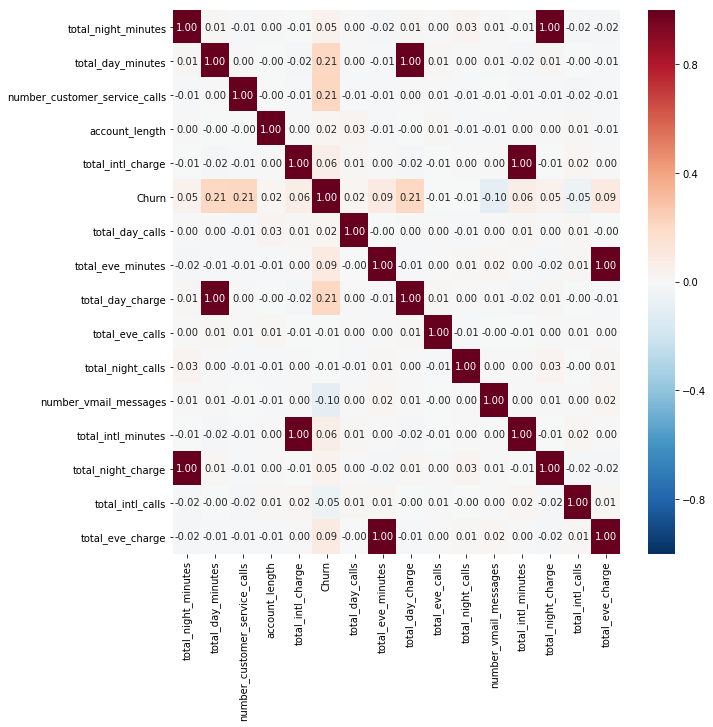

In [22]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['state', 'international_plan', 
                      'voice_mail_plan', 'area_code']))
corr_matrix = df[numerical].corr()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,  vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", annot_kws={"size": 10}, 
            ax= ax, cmap="RdBu_r")
plt.show()

In [23]:
#select a sample
sampled_data = df[numerical]
sampled_data = sampled_data.sample(replace = False, frac = 0.10)
sampled_data.shape

(500, 17)

In [24]:
import seaborn as sns
sns.set(style="ticks")

col_1 = list([ 'number_vmail_messages',
       'total_day_minutes', 'number_customer_service_calls', #'consume_high',
        'Churn'])

col_2 = list(['total_night_calls', 
       'total_intl_minutes', 'total_intl_calls',
        'Churn', 'total_day_calls', 'account_length',
              'total_eve_minutes', 'total_eve_calls',
              'total_night_minutes'
       ])

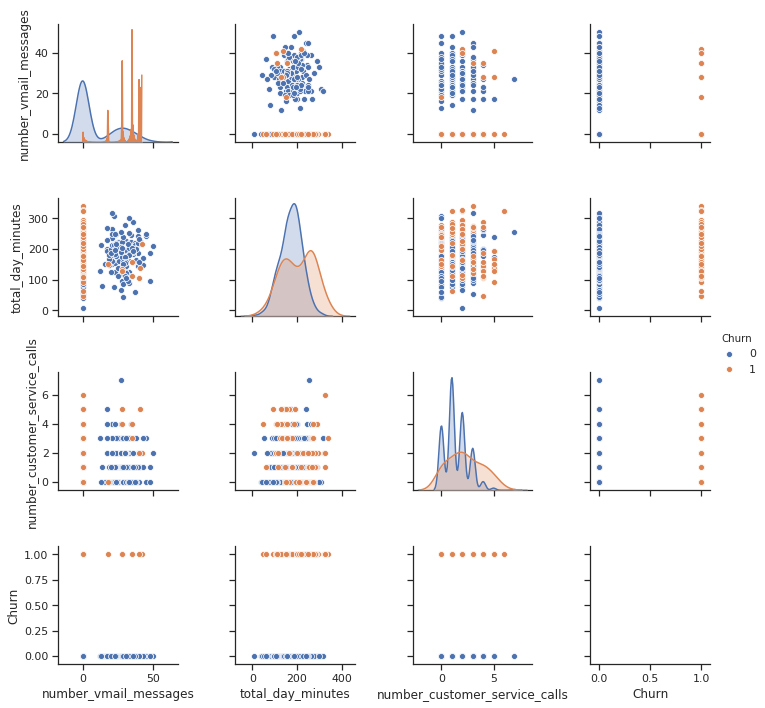

In [25]:
#sampled_data.loc[:, col_1].head()
sns.pairplot(sampled_data.loc[:, col_1], hue="Churn")#

In [26]:
col_1 = list([ 'number_vmail_messages',
       'total_day_minutes', 'number_customer_service_calls', #'consume_high',
        'Churn'])

col_2 = list(['total_night_calls', 
       'total_intl_minutes', 'total_intl_calls',
        'Churn', 'total_day_calls', 'account_length',
              'total_eve_minutes', 'total_eve_calls',
              'total_night_minutes'
       ])

In [27]:
numerical

['total_night_minutes',
 'total_day_minutes',
 'number_customer_service_calls',
 'account_length',
 'total_intl_charge',
 'Churn',
 'total_day_calls',
 'total_eve_minutes',
 'phone_number',
 'total_day_charge',
 'total_eve_calls',
 'total_night_calls',
 'number_vmail_messages',
 'total_intl_minutes',
 'total_night_charge',
 'total_intl_calls',
 'total_eve_charge']

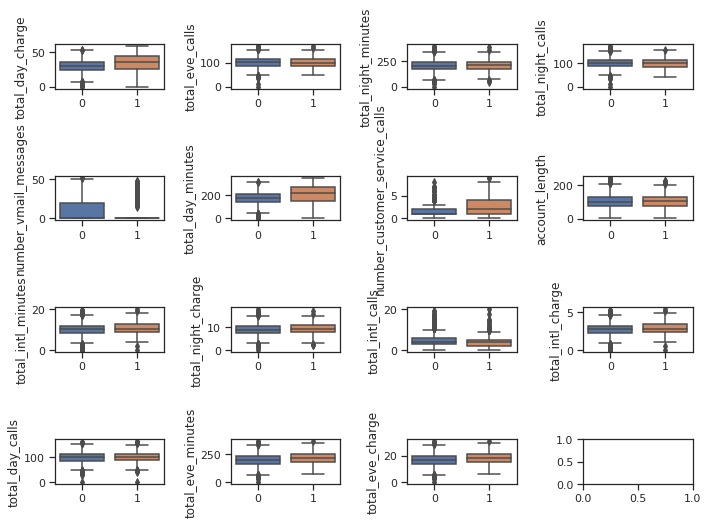

In [28]:
numerical = list(set(df.columns) - 
                 set(['state', 'international_plan', 'Churn', 'phone_number',
                      'voice_mail_plan', 'area_code']))
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

/home/erikapat/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/erikapat/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


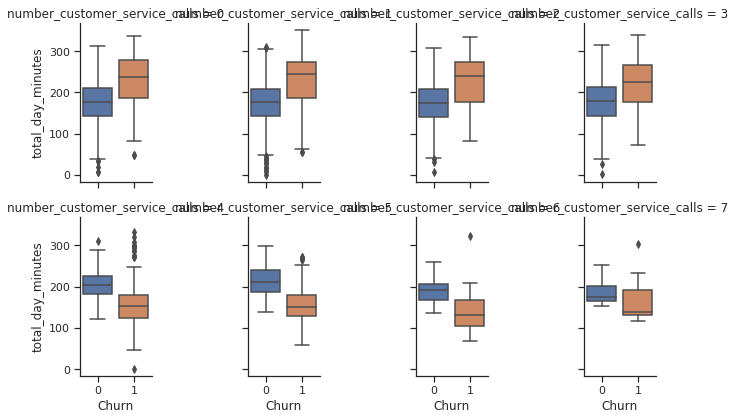

In [29]:
sns.factorplot(x='Churn', y='total_day_minutes',
               col='number_customer_service_calls',
               data=df[df['number_customer_service_calls'] < 8], 
               kind="box", col_wrap=4, size=3, aspect=.8);

From this, we could conclude that, starting with 4 calls, Total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

In [30]:
#var = 'area_code'
#df = from_categorical_to_dummies(df, var)
#var = 'Churn'
#df = from_categorical_to_dummies(df, var)
#var = 'state'
#df = from_categorical_to_dummies(df, var)


## T-SNE

In [36]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
X = df.drop(['Churn', 'state', 'phone_number', 'area_code'], axis=1)

var = 'international_plan'
X = from_categorical_to_dummies(X, var)
var = 'voice_mail_plan'
X = from_categorical_to_dummies(X, var)


In [37]:
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_ yes,voice_mail_plan_ yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/erikapat/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/erikapat/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
%%time 
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 58.3 s, sys: 0 ns, total: 58.3 s
Wall time: 58.3 s


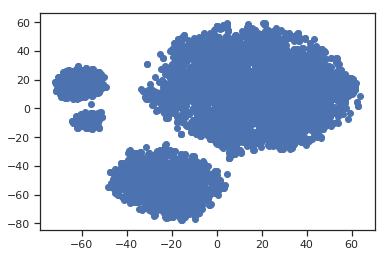

In [40]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

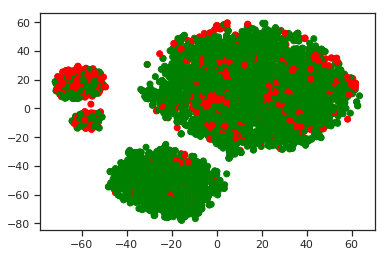

In [41]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['Churn'].map({0: 'green', 1: 'red'}));

In [53]:
# remove spaces in those variables that are strings

df.international_plan = df.international_plan.str.replace(' ', '')
df.voice_mail_plan = df.voice_mail_plan.str.replace(' ', '')

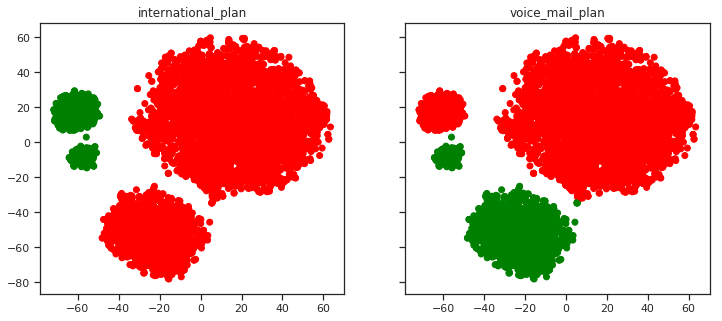

In [55]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
for i, name in enumerate(['international_plan', 'voice_mail_plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'yes': 'green', 'no': 'red'}))
    axes[i].set_title(name)

In [56]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


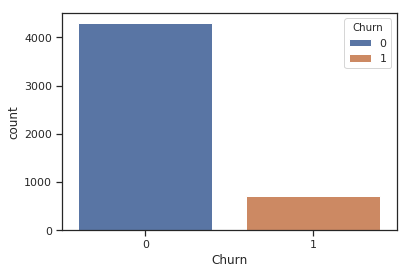

In [86]:

sns.countplot(x='Churn', hue='Churn',
             data=df, dodge=False);


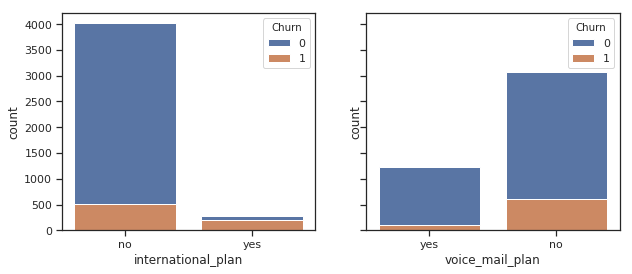

In [95]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 


sns.countplot(x='international_plan', hue='Churn',
             data=df, ax=axes[0], dodge=False);

sns.countplot(x='voice_mail_plan', hue='Churn',
             data=df, ax=axes[1], dodge=False);

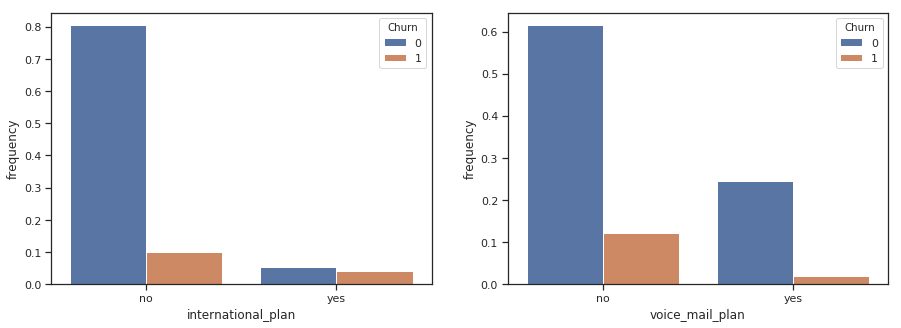

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['frequency'] = 0 # a dummy column to refer to
total = len(df)
for col, ax in zip(['international_plan', 'voice_mail_plan'], axes.flatten()):
    counts = df.groupby([col, 'Churn']).count()
    freq_per_total = counts.div(total).reset_index()
    sns.barplot(x=col, y='frequency', hue='Churn', data=freq_per_total, ax=ax)

In [120]:
pd.crosstab(df['Churn'], df['Churn'],  normalize=True)

Churn,0,1
Churn,,
0,0.8586,0.0000
1,0.0000,0.1414


In [121]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f7abc0d17b8>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variables.
    
    

In [132]:
# Load in the r magic
%load_ext rpy2.ipython
%R require(ggplot2)
%R require(dplyr)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

/home/erikapat/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Churn". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))


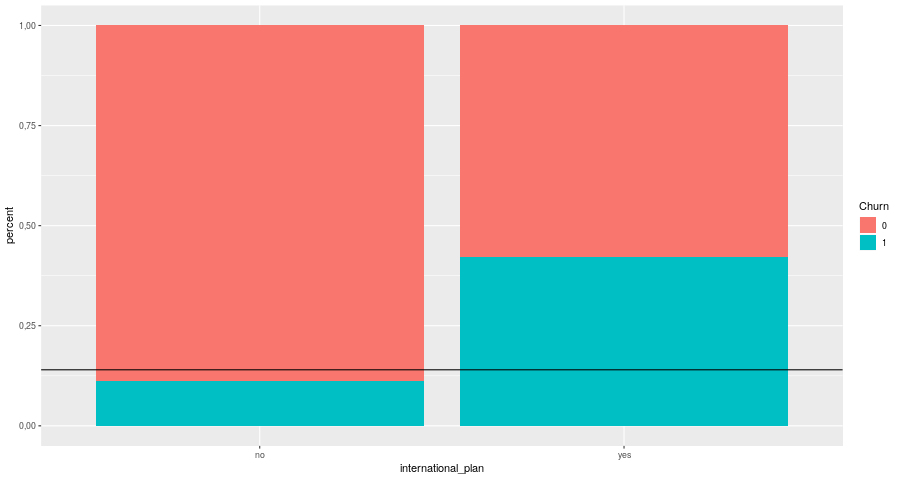

In [160]:
%%R -i df -w 900 -h 480 -u px
# Plot the DataFrame df
df.x = df %>% select(international_plan, Churn) %>% mutate(key = paste0( international_plan, '-', Churn))
df.x = df.x %>% group_by(key) %>% mutate(count = n()) %>% ungroup() %>% filter(!duplicated(key)) %>% mutate(key = NULL)
df.x = df.x %>% mutate(key = international_plan) %>%  group_by(key) %>% mutate(total = sum(count)) %>% ungroup()  %>% mutate(key = NULL)
df.x = df.x %>% mutate(percent = count/total) 
df.x = df.x %>% mutate(key = Churn) %>% group_by(key) %>% mutate(count_c = sum(count)) %>% ungroup() %>% mutate(key = NULL)
#df.x = df.x %>% mutate(count = NULL, total = NULL)
head(df.x)
ggplot(data=df.x, aes(x = international_plan, y = percent, fill = Churn)) + geom_bar(stat = "identity") +
geom_hline(yintercept = 0.14, color = 'black')

La línea horizontal representa el porcentaje de churn, tener un plan internacional afecta de manera significativa a que el liente haga churn...

/home/erikapat/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Churn". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))


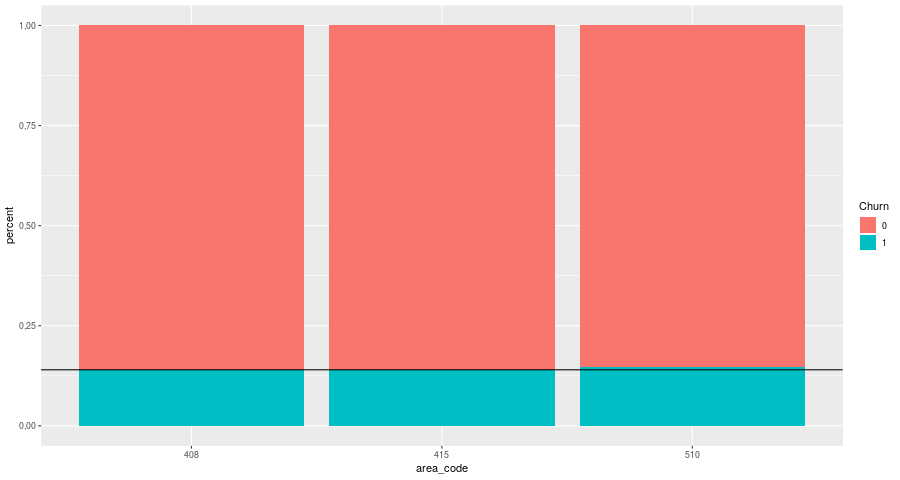

In [162]:
%%R -i df -w 900 -h 480 -u px
# Plot the DataFrame df
df.x = df %>% select(area_code, Churn) %>% mutate(key = paste0( area_code, '-', Churn))
df.x = df.x %>% group_by(key) %>% mutate(count = n()) %>% ungroup() %>% filter(!duplicated(key)) %>% mutate(key = NULL)
df.x = df.x %>% mutate(key = area_code) %>%  group_by(key) %>% mutate(total = sum(count)) %>% ungroup()  %>% mutate(key = NULL)
df.x = df.x %>% mutate(percent = count/total) 
df.x = df.x %>% mutate(key = Churn) %>% group_by(key) %>% mutate(count_c = sum(count)) %>% ungroup() %>% 
mutate(key = NULL)
#df.x = df.x %>% mutate(count = NULL, total = NULL)

ggplot(data=df.x, aes(x = area_code, y = percent, fill = Churn)) + geom_bar(stat = "identity") +
geom_hline(yintercept = 0.14, color = 'black')

In [164]:
%%R -i df -w 900 -h 480 -u px
head(df.x)

/home/erikapat/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Churn". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))


# A tibble: 6 x 6
  area_code Churn count total percent count_c
  <chr>     <chr> <int> <int>   <dbl>   <int>
1 415       0      2149  2495   0.861    4293
2 408       0      1082  1259   0.859    4293
3 510       0      1062  1246   0.852    4293
4 415       1       346  2495   0.139     707
5 408       1       177  1259   0.141     707
6 510       1       184  1246   0.148     707


/home/erikapat/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Churn". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))


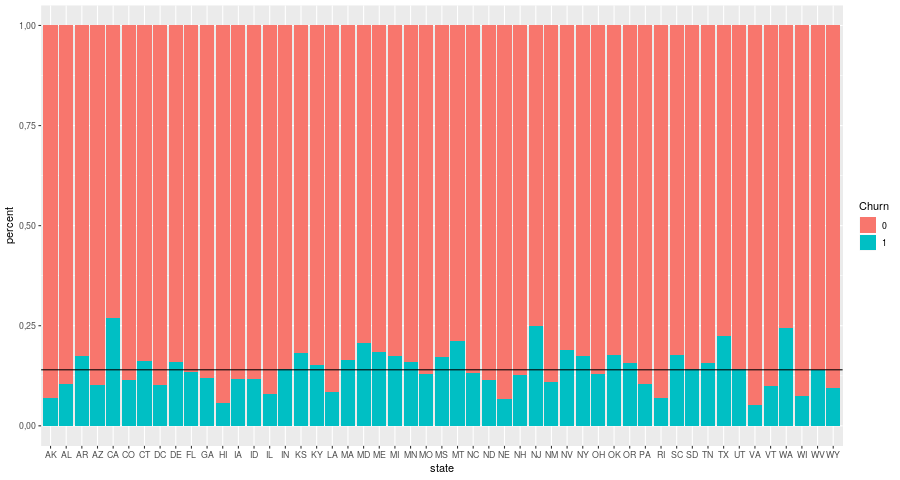

In [165]:
%%R -i df -w 900 -h 480 -u px
# Plot the DataFrame df
df.x = df %>% select(state, Churn) %>% mutate(key = paste0( state, '-', Churn))
df.x = df.x %>% group_by(key) %>% mutate(count = n()) %>% ungroup() %>% filter(!duplicated(key)) %>% 
mutate(key = NULL)
df.x = df.x %>% mutate(key = state) %>%  group_by(key) %>% mutate(total = sum(count)) %>% ungroup()  %>% 
mutate(key = NULL)
df.x = df.x %>% mutate(percent = count/total) 
df.x = df.x %>% mutate(key = Churn) %>% group_by(key) %>% mutate(count_c = sum(count)) %>% ungroup() %>% 
mutate(key = NULL)
#df.x = df.x %>% mutate(count = NULL, total = NULL)

ggplot(data=df.x, aes(x = state, y = percent, fill = Churn)) + geom_bar(stat = "identity") +
geom_hline(yintercept = 0.14, color = 'black')

In [170]:
import plotly.plotly as py
import plotly.figure_factory as ff

In [173]:
ff.create_distplot(df.number_customer_service_calls,  bin_size=.2)

TypeError: create_distplot() missing 1 required positional argument: 'group_labels'

## Predictive modelling

In [194]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data = df.drop(['state', 'phone_number', 'area_code', 'frequency'], axis=1) # no olvidar quitar lasm uy correlacionadas

var = 'international_plan'
data = from_categorical_to_dummies(data, var)
var = 'voice_mail_plan'
data = from_categorical_to_dummies(data, var)

In [195]:
import random
random.seed(1)
random.randint(1, 10)

3

In [203]:
import random
random.seed(1)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.25)

train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')
test_x.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
4171,36,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,1,1
4535,54,0,199.8,94,33.97,308.0,112,26.18,162.6,99,7.32,10.1,4,2.73,0,0,0
4852,41,24,247.6,97,42.09,199.7,106,16.97,217.7,91,9.80,12.1,6,3.27,1,0,1
3304,71,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1,0
2168,173,0,191.4,114,32.54,168.5,138,14.32,109.3,99,4.92,10.3,3,2.78,1,0,0


## Logistic regression

In [204]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

test_y_pred = logisticRegr.predict(test_x)


In [205]:
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))


Intercept: [-5.7137077]
Regression: [[ 1.04121670e-04  1.66701150e-02  1.48932049e-02 -2.38264421e-03
  -1.53235980e-02  4.19972135e-03 -6.32699180e-03  1.87715765e-02
   3.58468802e-03 -5.61200431e-03 -2.18012559e-02  6.35132861e-02
  -8.55290996e-02  8.31920237e-03  4.79756549e-01  1.96758130e+00
  -1.54475456e+00]]
Accuracy of logistic regression classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1074
           1       0.57      0.17      0.26       176

   micro avg       0.86      0.86      0.86      1250
   macro avg       0.72      0.57      0.59      1250
weighted avg       0.83      0.86      0.83      1250



Text(0.5, 12.5, 'Predicted label')

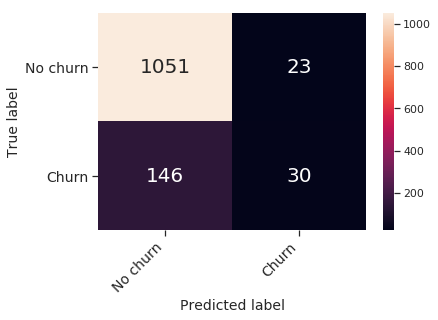

In [206]:

confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


## How to handle imbalanced classes
Look for the tutorial in churn + pyspark

## DECISION TREES

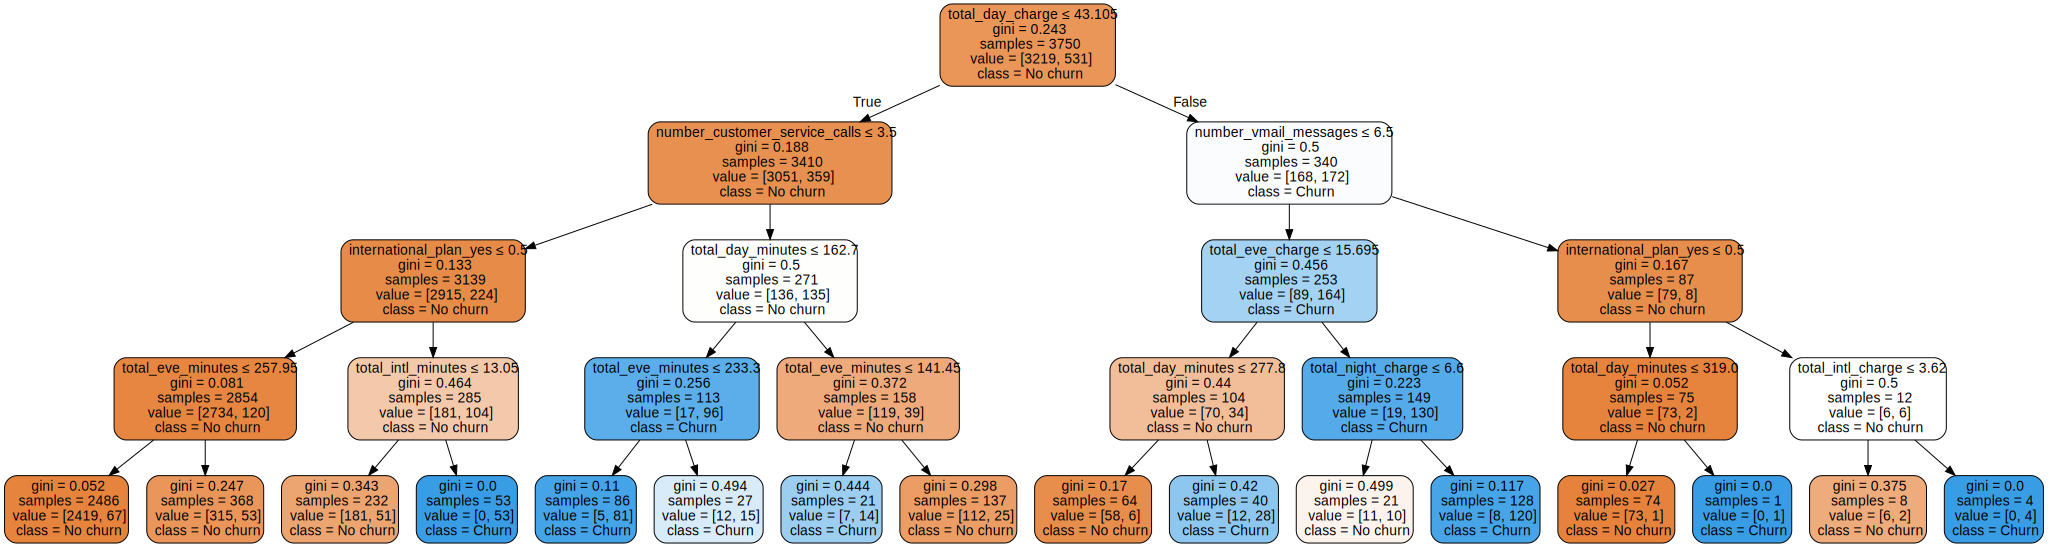

In [212]:
from sklearn import tree
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
#graph.render('decision_tree.gv', view=True)
graph

In [213]:

test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))

Accuracy of decision tree classifier on test set: 0.93


## Random forests


In [214]:

from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Accuracy of random forest classifier on test set: 0.95
Accuracy of random forest classifier on test set: 0.95
